<a href="https://colab.research.google.com/github/javittoOliver/PV/blob/main/pv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import shuffle
import warnings
import copy

# Deshabilitar advertencias de deprecación de scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# **EDA** (exploración de datos)

In [ ]:
datos

,SEXO,PROVINCIA,TELEFONO,EDAD,FAPERT,SEGMENTO,BASE,CL,VENTA
INDEX,,,,,,,,,
GAL_00759,F,BS_AS,CELULAR,71,2012,Mixto Con Financ.Z,Stock,CLUSTER_0,1
GAL_00970,M,BS_AS,CELULAR,66,2018,Tx Con Financ.,Virgen,CLUSTER_0,1
GAL_01333,F,BS_AS,CELULAR,77,2007,Mixto,Stock,CLUSTER_0,1
GAL_01678,M,BS_AS,CELULAR,74,2015,Mixto Con Financ.Z,Stock,CLUSTER_0,1
GAL_02071,F,BS_AS,CELULAR,74,2009,Debitador Con Financ.,Stock,CLUSTER_0,1
...,...,...,...,...,...,...,...,...,...
GAL_82362,F,CORDOBA,CELULAR,66,2017,Tx Sin Financ.,Virgen,CLUSTER_0,1
GAL_82371,F,CORDOBA,CELULAR,62,2017,Mixto Con Financ.Z,Virgen,CLUSTER_1,1
GAL_82386,F,CORDOBA,CELULAR,50,2017,Mixto Con Financ.Z,Virgen,CLUSTER_1,1


In [ ]:
# DEPURACION
#ELIMINO NULOS
eda = datos.dropna()

## ¿Cuantas Ventas hay en la base?

<Axes: title={'center': 'Porcentaje de VENTAS'}, ylabel='VENTA'>

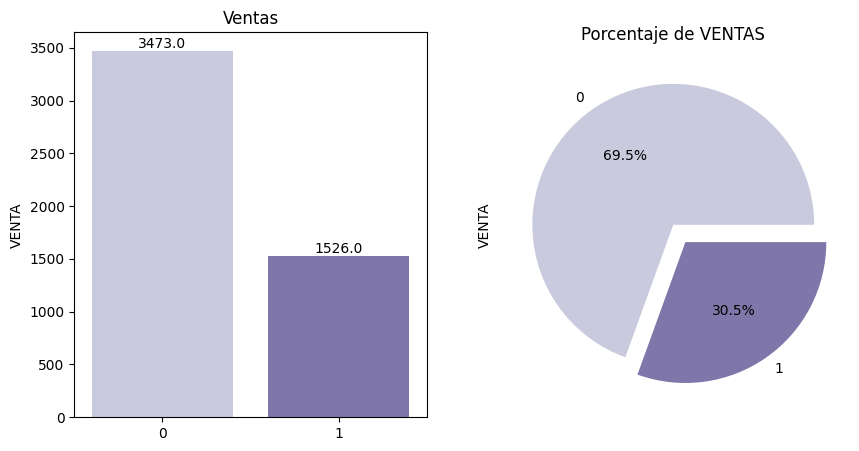

In [ ]:
plt.subplot(1, 2, 1)
sns.barplot(x= eda['VENTA'].value_counts().index, y= eda['VENTA'].value_counts(), palette="Purples")
plt.title("Ventas")
# Agregar etiquetas con la cantidad en las barras
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1,2,2)
count = eda['VENTA'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['#c9cade','#7f77aa'], figsize = (10,5),explode = [0,0.15],title = "Porcentaje de VENTAS")

##¿Como es la distribución por Genero en la Base?

<Axes: title={'center': '% Genero'}, ylabel='SEXO'>

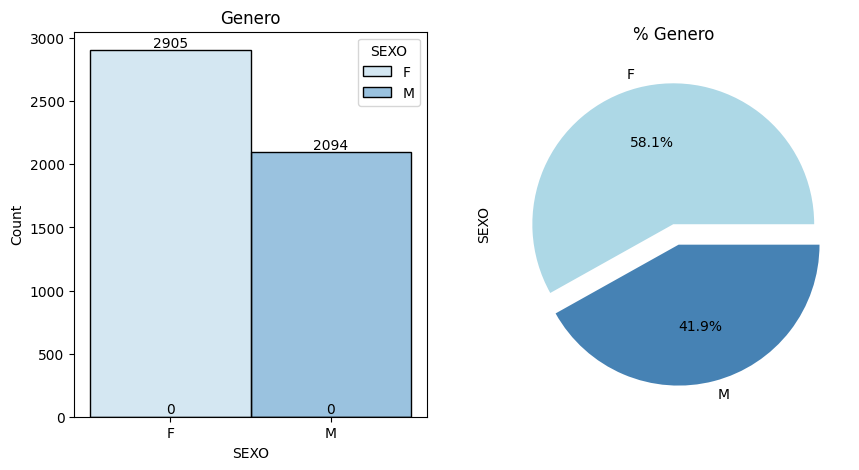

In [ ]:
plt.subplot(1, 2, 1)

sns.histplot(data=eda, x="SEXO", hue="SEXO", palette="Blues")
plt.title('Genero')

# AGREGO ETIQUETAS EN LAS BARRAS
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1,2,2)
countg = eda['SEXO'].value_counts()
countg.plot.pie(autopct = '%1.1f%%',colors=['lightblue','Steelblue'], figsize = (10,5),explode = [0,0.15],title = "% Genero")

## ¿A qué genero se vende más?

<Axes: title={'center': '% Ventas x Genero'}, ylabel='SEXO'>

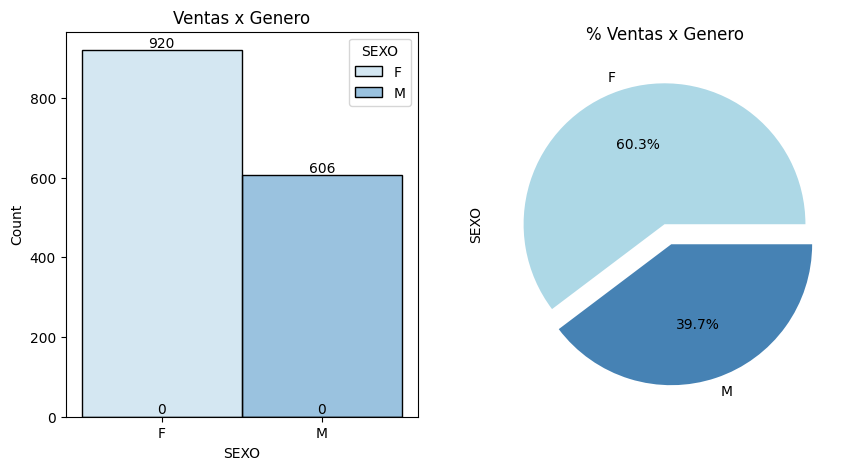

In [ ]:
eda_vta = eda[eda.VENTA == 1]
plt.subplot(1, 2, 1)

sns.histplot(data=eda_vta, x="SEXO", hue="SEXO", palette="Blues")
plt.title('Ventas x Genero')
# AGREGO ETIQUETAS EN LAS BARRAS
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.subplot(1,2,2)
countg = eda_vta['SEXO'].value_counts()
countg.plot.pie(autopct = '%1.1f%%',colors=['lightblue','Steelblue'], figsize = (10,5),explode = [0,0.15],title = "% Ventas x Genero")

## Hay más ventas al género Femenino en total, pero en peso porcentual, filtrando las muestras, ¿la tendencia es la misma?

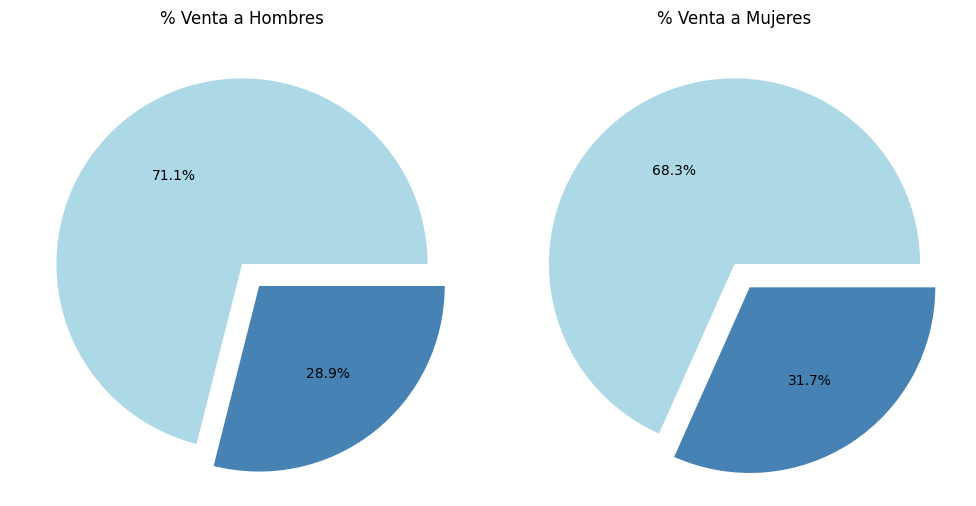

In [ ]:
# Crear una figura con 1 fila y 2 columnas de subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

eda_m = eda[eda.SEXO == "M"]
countg_fijo = eda_m['VENTA'].value_counts()
axes[0].pie(countg_fijo, autopct='%1.1f%%', colors=['lightblue', 'steelblue'], explode=[0, 0.15])
axes[0].set_title("% Venta a Hombres")

eda_f = eda[eda.SEXO == "F"]
countg_movil = eda_f['VENTA'].value_counts()
axes[1].pie(countg_movil, autopct='%1.1f%%', colors=['lightblue', 'steelblue'], explode=[0, 0.15])
axes[1].set_title("% Venta a Mujeres")

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

## Resumen de estadístico de Edad y ventas

In [ ]:
lista = eda.columns.tolist()
lista.remove('FAPERT')
eda[lista].describe(percentiles = [.25,.50,.75,.99])

,EDAD,VENTA
count,4999.000000,4999.000000
mean,64.209642,0.305261
std,7.999253,0.460564
min,49.000000,0.000000
25%,57.000000,0.000000
50%,66.000000,0.000000
75%,70.000000,1.000000
99%,78.000000,1.000000
max,79.000000,1.000000


## La media de edad de los clientes de la base es de 64 años ¿Como se comportan las ventas?

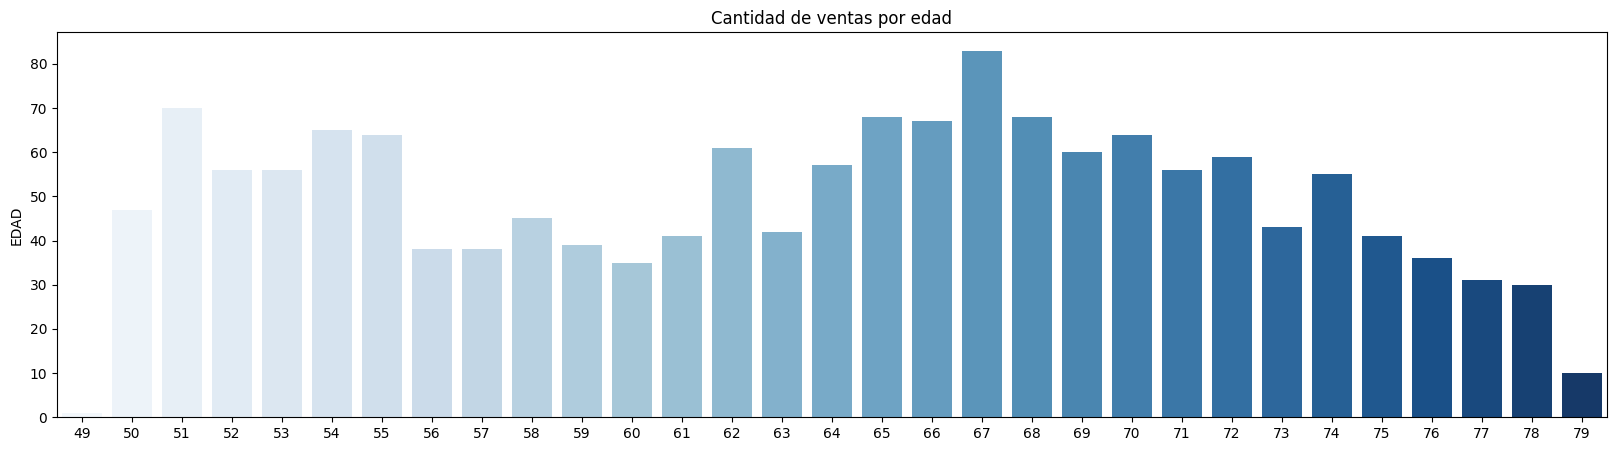

Mediana = 65.0


In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x=eda_vta['EDAD'].value_counts().index, y=eda_vta['EDAD'].value_counts(), palette="Blues")
plt.title('Cantidad de ventas por edad')
plt.show()
print(f"Mediana = {eda_vta['EDAD'].median()}")

## Hay ventas en el rando de 50 a 79 años, con pico máximo en 68 ¿Como se comporta la tendencia por edad y género?

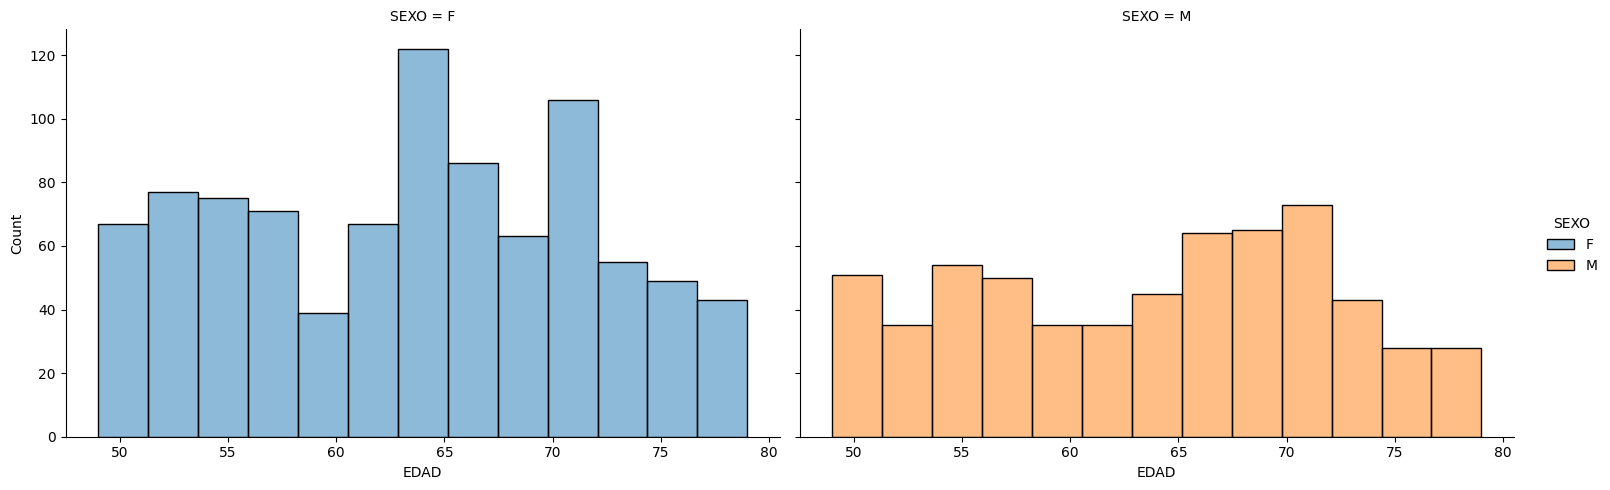

In [ ]:
#POR EDAD Y GENERO

sns.displot(data=eda_vta, x="EDAD", hue="SEXO", col="SEXO", height=5, aspect=1.55)

Es similar, en conclusión tiene más peso la Edad que el género pero ambas son variables necesarias para el entrenamiento del modelo

## ¿Como se distribuyen las ventas por Provincia y el tipo de teléfono?

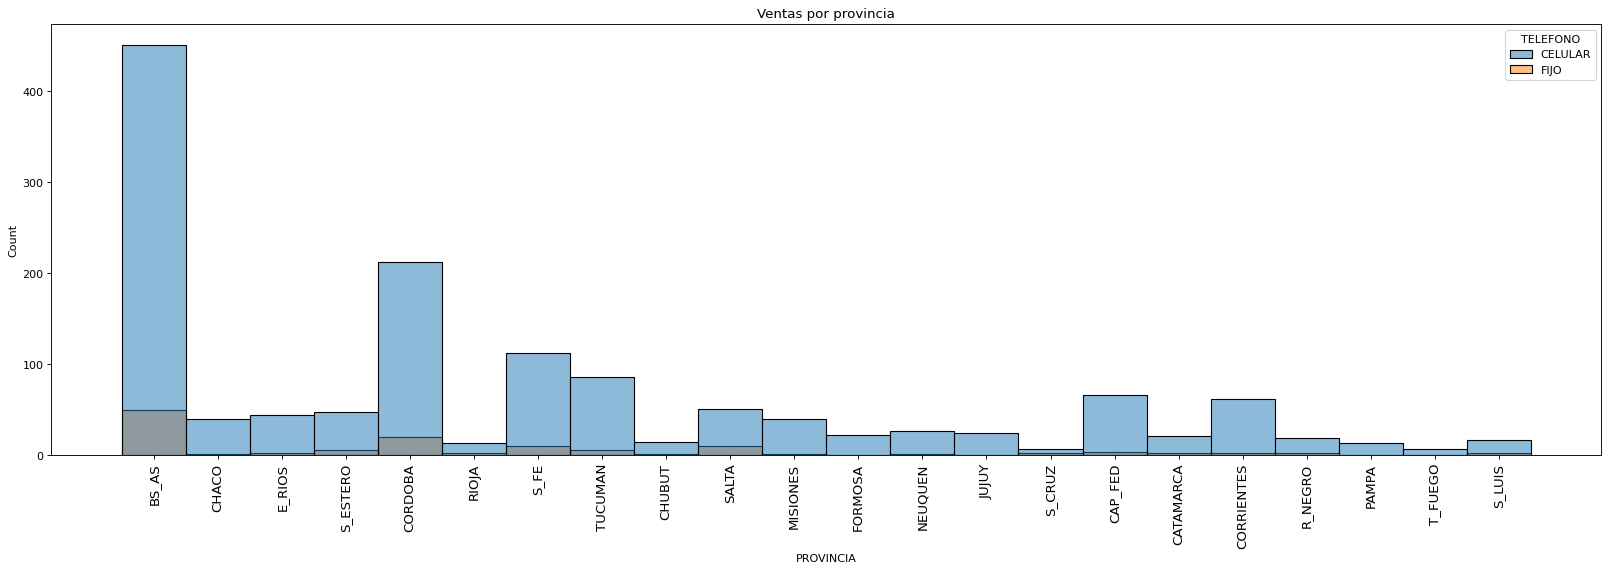

In [ ]:
fig, ax = plt.subplots(figsize=(25, 7), dpi=80)
sns.histplot(data=eda_vta, x="PROVINCIA", hue="TELEFONO", element="bars", binwidth=1)
ax.set_title('Ventas por provincia')

# DEFINO EL TAMAÑO DE LA FUENTE EN X Y ETIQUETAS VERTICALES
ax.set_xticks(range(len(eda_vta['PROVINCIA'].unique())))
ax.set_xticklabels(eda_vta['PROVINCIA'].unique(), fontsize=12, rotation=90)

plt.show()

## ¿Que peso porcentual por provincia tienen el total de registros de la base?

In [ ]:
porcentaje_fapert = eda['PROVINCIA'].value_counts(normalize=True) * 100
porcentaje_fapert.head(10)

BS_AS         25.585117
CORDOBA       21.164233
S_FE           8.001600
TUCUMAN        6.881376
SALTA          5.041008
CAP_FED        4.820964
CORRIENTES     3.200640
S_ESTERO       3.140628
CHACO          2.660532
E_RIOS         2.480496
Name: PROVINCIA, dtype: float64

La distribucion de registros por provincia en la base explica la variabilidad de las ventas

## ¿Hay más teléfonos Celulares que fijos en la Base?

<Axes: title={'center': '% TELEFONOS'}, ylabel='TELEFONO'>

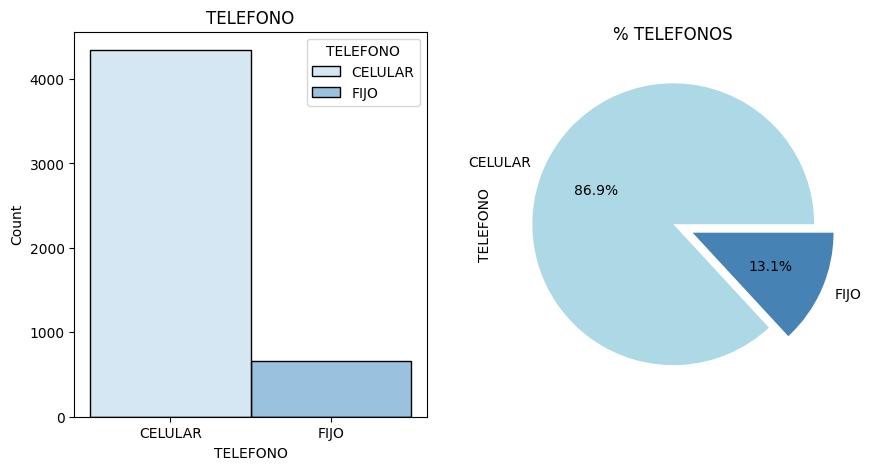

In [ ]:
plt.subplot(1, 2, 1)

sns.histplot(data=eda, x="TELEFONO", hue="TELEFONO", palette="Blues")
plt.title('TELEFONO')

plt.subplot(1,2,2)
countg = eda['TELEFONO'].value_counts()
countg.plot.pie(autopct = '%1.1f%%',colors=['lightblue','Steelblue'], figsize = (10,5),explode = [0,0.15],title = "% TELEFONOS")

## Proporcionalmente ¿se vende más a telefonos Fijos o Celulares?

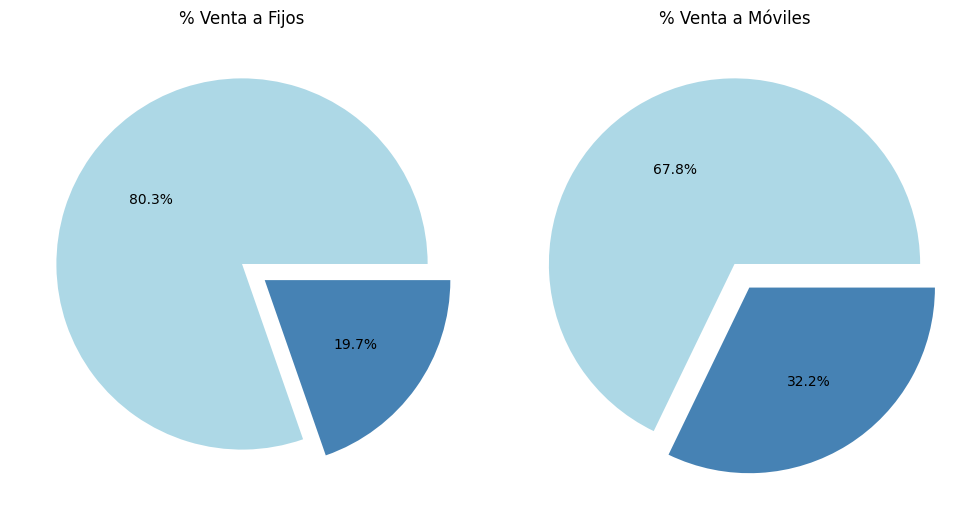

In [ ]:
# CREO UNA FIGURA CON UNA FILA Y 2 COLUMNAS DE SUBPLOTS
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

eda_fijo = eda[eda.TELEFONO == "FIJO"]
countg_fijo = eda_fijo['VENTA'].value_counts()
axes[0].pie(countg_fijo, autopct='%1.1f%%', colors=['lightblue', 'steelblue'], explode=[0, 0.15])
axes[0].set_title("% Venta a Fijos")

eda_movil = eda[eda.TELEFONO == "CELULAR"]
countg_movil = eda_movil['VENTA'].value_counts()
axes[1].pie(countg_movil, autopct='%1.1f%%', colors=['lightblue', 'steelblue'], explode=[0, 0.15])
axes[1].set_title("% Venta a Móviles")

# AJUSTE DE ESPACIADO ENTRE SUBPLOTS
plt.tight_layout()
plt.show()

Es más eficiente la venta a Móviles que a Fijos

## ¿Como se distribuyen las ventas por SEGMENTO?

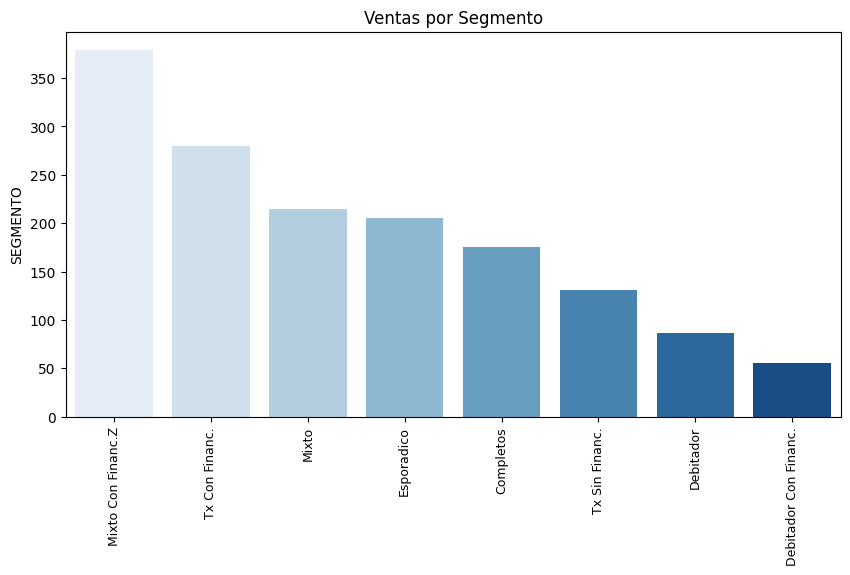

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Ventas por Segmento')
ax = sns.barplot(x=eda_vta['SEGMENTO'].value_counts().index, y=eda_vta['SEGMENTO'].value_counts(), palette="Blues")
# MODIFICO EL TAMAÑO DE LAS ETIQUETAS EN X Y LAS COLOCO VERTICAL
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=90)

plt.show()

## ¿Como se distribuyen las ventas por FAPERT? Fecha de apertura (Año)

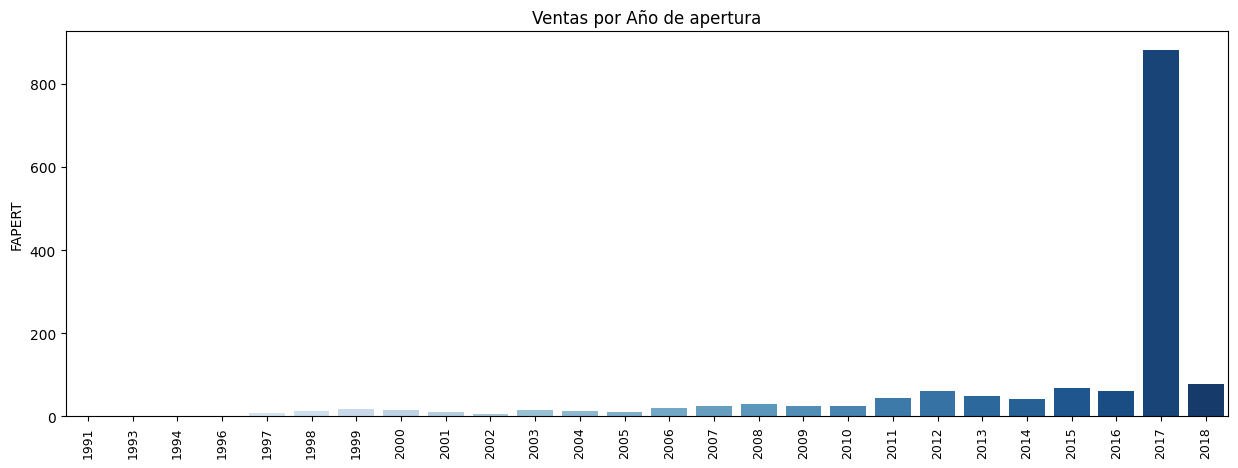

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Ventas por Año de apertura')

ax = sns.barplot(x=eda_vta['FAPERT'].value_counts().index, y=eda_vta['FAPERT'].value_counts(), palette="Blues")
# MODIFICO EL TAMAÑO DE LAS ETIQUETAS EN X Y LAS COLOCO VERTCAL
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=90)

plt.show()

Hay tendencia alcista de ventas al acercarce al año actual

## ¿Como se distribuyen los registros por fechas de apertura en toda la base?

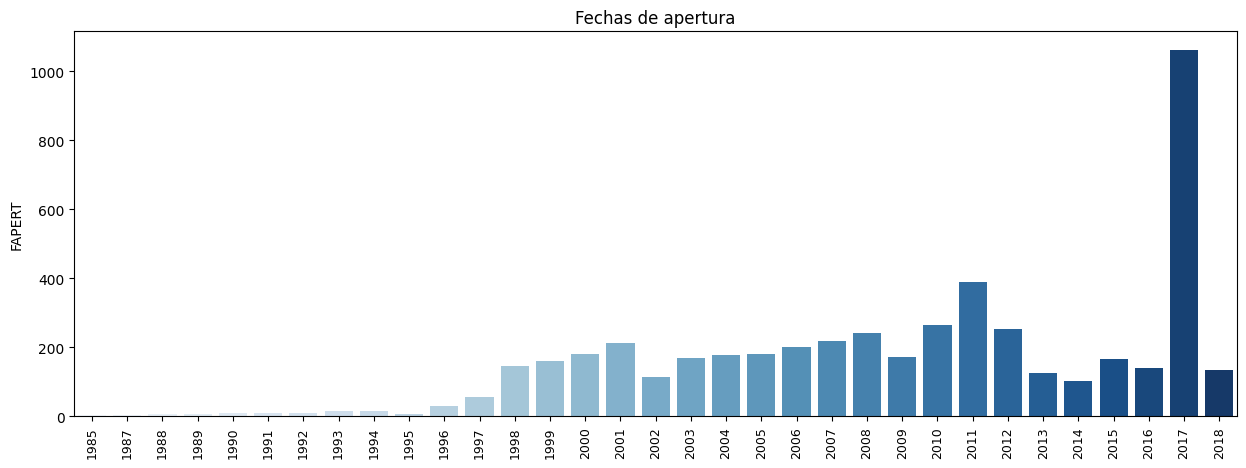

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Fechas de apertura')

ax = sns.barplot(x=eda['FAPERT'].value_counts().index, y=eda['FAPERT'].value_counts(), palette="Blues")
# DEFINO EL TAMAÑO DE LAS ETIQUETAS EN X Y LA ORIENTACION EN VERTICAL
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=90)

plt.show()

In [ ]:
porcentaje_fapert = eda['FAPERT'].value_counts(normalize=True) * 100
porcentaje_fapert.head(10)

2017    21.244249
2011     7.761552
2010     5.321064
2012     5.061012
2008     4.820964
2007     4.360872
2001     4.280856
2006     4.040808
2000     3.640728
2005     3.620724
Name: FAPERT, dtype: float64

La tendencia es similar a la proporción de registros agrupados por su Fecha de apertura en algunos grupos, probablemente sea más eficiente construir una variable a partir de esta que muestre la antiguedad de los registros respecto a la fecha actual, para escalar la variable en proximas bases.
El 21% de los registros están en el grupo de FAPERT 2017, si son fechas aleatoreas y no corresponden a un dato generado por alguna característica del cliente es conveniente evitar la variable para entrenar

In [ ]:
from datetime import datetime, timedelta
# OBTENGO AÑO ACTUAL COMO NUMERO
ano_actual = datetime.today().year
# CONVIERTO EL AÑO EN INT64
ano_actual_int64 = pd.to_numeric(ano_actual, downcast='integer')

#ALMACENO EL DATAFRAME COMO COPIA EN OTRO DATAFRAME
eda_variables = copy.deepcopy(eda)
eda_variables['hoy'] = ano_actual_int64
#CONSTRUYO VARIABLE ANTIGUEDAD RESTANDO AL AÑO ACTUAL LA FECHA DE APERTURA
eda_variables['ANT'] = eda_variables['hoy'] - eda_variables['FAPERT']
eda_variables = eda_variables.drop(['hoy'], axis=1)

#tRANSFORMO LA VARIABLE SEXO DE CATEGORICA A BINARIA
eda_variables['SEXO'] = eda_variables['SEXO'].replace({'M': 1, 'F': 0})

## Distribución de Ventas por BASE

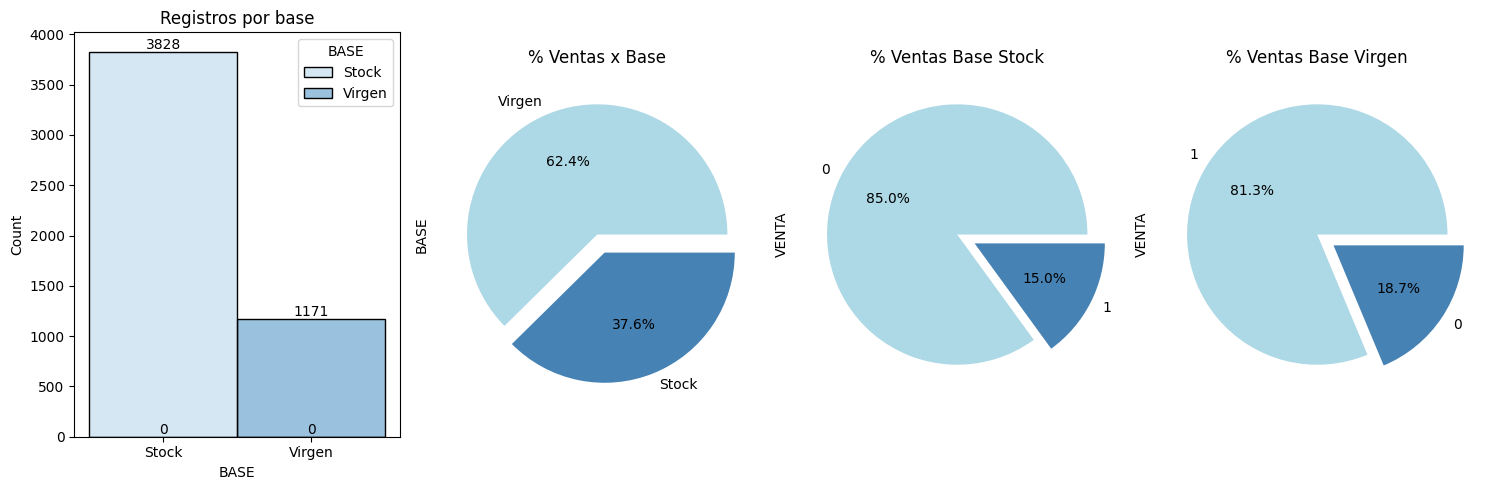

In [ ]:
# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Gráfico 1
sns.histplot(data=eda, x="BASE", hue="BASE", palette="Blues", ax=axes[0])
axes[0].set_title('Registros por base')

# AGREGO ETIQUETAS EN LAS BARRAS
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 2
countg = eda_vta['BASE'].value_counts()
countg.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'Steelblue'], explode=[0, 0.15], ax=axes[1])
axes[1].set_title("% Ventas x Base")

# Gráfico 3
eda_stock = eda[eda.BASE == "Stock"]
countg = eda_stock['VENTA'].value_counts()
countg.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'Steelblue'], explode=[0, 0.15], ax=axes[2])
axes[2].set_title("% Ventas Base Stock")

# Gráfico 4
eda_virgen = eda[eda.BASE == "Virgen"]
countg = eda_virgen['VENTA'].value_counts()
countg.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'Steelblue'], explode=[0, 0.15], ax=axes[3])
axes[3].set_title("% Ventas Base Virgen")

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


## Matriz de Correlación

<ipython-input-22-e3068d85c890>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(eda_variables.corr(),linewidths=2, annot=True, square=True,annot_kws={'size': 10},cmap='OrRd')


<Axes: title={'center': 'Cuadro de Correlación'}>

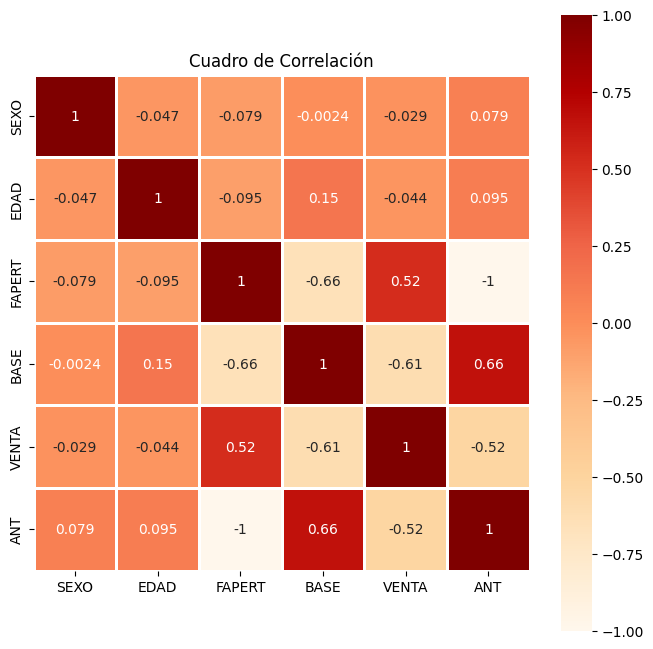

In [ ]:
# MODIFICO VALORES DE BASE A BINARIOS PARA SUMAN AL ANALISIS DE CORRELACION
eda_variables['BASE'] = eda_variables['BASE'].replace({'Stock': 1, 'Virgen': 0})

plt.figure(figsize=(8,8))
plt.title("Cuadro de Correlación")
sns.heatmap(eda_variables.corr(),linewidths=2, annot=True, square=True,annot_kws={'size': 10},cmap='OrRd')

Hay una fuerte correlacion con la Antiguedad (y por ende fecha de apertura también) probablemente influenciada por la distribución que tiene la base con estos valores. También con el tipo de base. Se trata de dos indicadores que explican la variabilidad de la mayor cantidad de datos.

# **Preparación de datos**

## Crudo para entrenar el modelo

In [ ]:
# DEPURACION
#ELIMINO NULOS
datos = datos.dropna()
#REORDENO ALEATOREAMENTE LAS FILAS EN EL DATAFRAME
datos = shuffle(datos, random_state=5)

#ELIMINO VARIABLE TARGET DEL DATAFRAME
valores = datos.drop(["VENTA"], axis=1)
#DEFINO TARGET
target = datos["VENTA"]

#CODIFICACIÓN ONE-HOT, CONVIERTO VARIABLES CATEGÓRICAS EN NUMÉRICAS
valores = pd.get_dummies(valores)
#ELIMINO COLUMNAS QUE NO VAN A UTILIZARSE EN EL ENTRENAMIENTO
valores = valores.drop(['CL_CLUSTER_0', 'CL_CLUSTER_1','CL_CLUSTER_2','CL_CLUSTER_3','CL_CLUSTER_4'], axis=1)
#CONVIERTO LOS VALORES EN ENTEROS
valores = valores.astype('int64')


datos_oct = datos_oct.dropna()
datos_oct.columns = datos_oct.columns.str.strip()

valores_oct = datos_oct.drop(["VENTA",'CL_CLUSTER_0', 'CL_CLUSTER_1'], axis=1)
target_oct = datos_oct["VENTA"]

valores_seg_pr = valores_oct[:7500]
target_seg_pr = target_oct[:7500]

## Datos de prueba para predecir ventas

In [ ]:
#COLUMNA "INDEX" COMO INDICE DEL DATAFRAME

datos_prueba.columns = datos_prueba.columns.str.strip()

valores_prueba = datos_prueba.drop("VENTA", axis=1)
valores_prueba = pd.get_dummies(valores_prueba)
target_prueba = datos_prueba["VENTA"]

In [ ]:
# ALTERNATIVA 1 DE ENTRENAMIENTO
# COPIO DATOS
datos_1 = copy.deepcopy(datos)
datos_1['hoy'] = ano_actual_int64
#CONSTRUYO VARIABLE ANTIGUEDAD RESTANDO AL AÑO ACTUAL LA FECHA DE APERTURA
datos_1['ANT'] = datos_1['hoy'] - datos_1['FAPERT']
datos_1 = datos_1.drop(['hoy', 'FAPERT'], axis=1)

# NOMBRES DE COLUMNAS PARA ORDENAR
columnas = datos_1.columns.tolist()
# ORDENO COLUMNAS
columnas.sort()
# REORDENO COLUMNAS DEL DATAFRAME
datos_1 = datos_1[columnas]


#ELIMINO VARIABLE TARGET DEL DATAFRAME
valores_1 = datos_1.drop(["VENTA"], axis=1)
#DEFINO TARGET
target_1 = datos_1["VENTA"]

#CODIFICACIÓN ONE-HOT, CONVIERTO VARIABLES CATEGÓRICAS EN NUMÉRICAS
valores_1 = pd.get_dummies(valores_1)
#ELIMINO COLUMNAS QUE NO VAN A UTILIZARSE EN EL ENTRENAMIENTO
valores_1 = valores_1.drop(['CL_CLUSTER_0', 'CL_CLUSTER_1','CL_CLUSTER_2','CL_CLUSTER_3','CL_CLUSTER_4'], axis=1)
#CONVIERTO LOS VALORES EN ENTEROS
valores_1 = valores_1.astype('int64')

# ALTERNATIVA 1 DE PRUEBA
datos_prueba_1 = copy.deepcopy(datos_prueba)
datos_prueba_1['hoy'] = ano_actual_int64
#CONSTRUYO VARIABLE ANTIGUEDAD RESTANDO AL AÑO ACTUAL LA FECHA DE APERTURA
datos_prueba_1['ANT'] = datos_prueba_1['hoy'] - datos_prueba_1['FAPERT']
datos_prueba_1 = datos_prueba_1.drop(['hoy', 'FAPERT'], axis=1)

# NOMBRES DE COLUMNAS PARA ORDENAR
columnas = datos_prueba_1.columns.tolist()
# ORDENO COLUMNAS
columnas.sort()
# REORDENO COLUMNAS DEL DATAFRAME
datos_prueba_1 = datos_prueba_1[columnas]


valores_prueba_1 = datos_prueba_1.drop("VENTA", axis=1)
valores_prueba_1 = pd.get_dummies(valores_prueba_1)
target_prueba_1 = datos_prueba["VENTA"]

# **AdaBoost**

El AdaBoostClassifier, que significa "Adaptive Boosting Classifier," es un algoritmo de machine learning supervisado utilizado para clasificación. AdaBoost es una técnica de ensamble que combina múltiples clasificadores débiles en un solo clasificador fuerte. Se utiliza ampliamente para mejorar la precisión de modelos de aprendizaje automático, especialmente en problemas de clasificación binaria.
El principio detrás de AdaBoost es adaptativo y se basa en la idea de que, al dar más peso a las muestras clasificadas incorrectamente por los clasificadores débiles en cada iteración, el algoritmo puede enfocarse en las muestras más difíciles de clasificar.


# Este algoritmo estaba en el código heredado y no está completo, implica desarrollo de varias etapas adicionales de entrenamiento:

1-Se inicia con un conjunto de datos de entrenamiento ponderado uniformemente.


2-Se entrena un clasificador débil, que es un modelo de aprendizaje relativamente simple, como un árbol de decisión o un clasificador lineal, en el conjunto de datos ponderado.

3-Se evalúa el rendimiento del clasificador débil en el conjunto de datos y se le asigna un peso en función de su precisión. Los clasificadores débiles que tienen un mejor rendimiento obtienen pesos más altos.

4-Se actualizan los pesos de las muestras en el conjunto de datos. Las muestras mal clasificadas por el clasificador débil actual obtienen un mayor peso, lo que les da más importancia en la siguiente iteración.

5-Se repiten los pasos 2-4 durante varias iteraciones (número de estimadores) con diferentes clasificadores débiles. Cada nuevo clasificador se entrena en el conjunto de datos con pesos actualizados.

6-Al final, los clasificadores débiles se combinan para formar un clasificador fuerte. La salida de este clasificador fuerte se calcula ponderando las predicciones de los clasificadores débiles en función de sus pesos.

# **AdaBoostClassifier**

## Entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(valores, target, test_size=0.4,
                                                    random_state=5)
ada = AdaBoostClassifier(n_estimators=450,random_state=5, learning_rate=1.25)

ada.fit(X_train, y_train)
preds = ada.predict(X_test)

#pred_x = binarize(pred_proba, 0.4995)

## Presicion - Accurancy

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, preds)}")

Accuracy: 0.842


Matriz de Confusión:
[[1261  121]
 [ 195  423]]


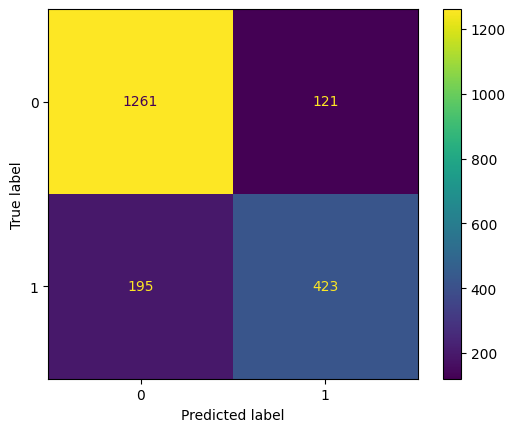

In [ ]:
# MATRIZ DE CONFUCIÓN
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
print("Matriz de Confusión:")
print(conf_matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
graf = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
graf.plot()

In [ ]:
#                           Predicción Positiva       Predicción Negativa
#Valor Real Positivo        TP (Verdadero Positivo)   FN (Falso Negativo)
#Valor Real Negativo        FP (Falso Positivo)       TN (Verdadero Negativo)
#Exactitud (Accuracy): Se calcula como (TP + TN) / (TP + TN + FP + FN) y representa la proporción de predicciones correctas en el conjunto de datos.
#(1261 + 423) / (1261 + 423 + 121 + 195) = 8,42

## Ajuste +  probabilidad de venta con el modelo entrenado AdaBoost

In [ ]:
#PREDICCION SOBRE VALORES DE BBDD OCTUBRE
pred = ada.predict(valores_seg_pr)
pred_proba = ada.predict_proba(valores_seg_pr)

#AJUSTO DATOS
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# REALIZA PREDICCION
probabilidades_prueba = ada.predict_proba(valores_prueba)

#DATOS SIN VENTAS
datos_test = datos_prueba.drop("VENTA", axis=1)

# CREO UNA COLUMNA EN EL DATAFRAME CON LAS PROBABILIDADES
datos_test["Probabilidad_Venta"] = probabilidades_prueba[:, 1]  # La columna 1 contiene las probabilidades de "venta"


In [ ]:
datos_test['Probabilidad_Venta']

INDEX
GAL_PRUEBAS_00291    0.500798
GAL_PRUEBAS_00724    0.500070
GAL_PRUEBAS_00746    0.499286
GAL_PRUEBAS_02740    0.499334
GAL_PRUEBAS_03552    0.498814
                       ...   
GAL_PRUEBAS_00193    0.498940
GAL_PRUEBAS_00194    0.499337
GAL_PRUEBAS_00195    0.498615
GAL_PRUEBAS_00196    0.498859
GAL_PRUEBAS_00197    0.500105
Name: Probabilidad_Venta, Length: 233, dtype: float64

# **RandomForest con Stratified- K fold**

Implementación de otro algoritmo

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

Stratified K-Fold es una técnica de validación cruzada utilizada en machine learning para evaluar y validar modelos de manera más robusta, especialmente cuando se trata de conjuntos de datos desequilibrados o con problemas de clasificación binaria. La validación cruzada es esencial para estimar el rendimiento de un modelo de manera más precisa, ya que ayuda a evaluar cómo se generaliza un modelo a datos no vistos.

El **RandomForestClassifier** es un algoritmo de aprendizaje automático supervisado. Este algoritmo pertenece a la categoría de "bosques aleatorios" (random forests), que es una técnica de ensamble. Un bosque aleatorio es una colección de árboles de decisión que se combinan para tomar decisiones más precisas y robustas en la clasificación.

Las ventajas del RandomForestClassifier incluyen:

Mayor precisión: Los bosques aleatorios suelen proporcionar un rendimiento sólido en una variedad de problemas de clasificación. Al combinar múltiples árboles de decisión, se reduce el riesgo de sobreajuste y se mejora la generalización.

Resistencia al sobreajuste: Dado que los árboles se construyen en subconjuntos de datos aleatorios, el modelo es menos propenso al sobreajuste en comparación con un solo árbol de decisión.

Manejo automático de características importantes: El RandomForestClassifier puede estimar la importancia de las características, lo que proporciona información sobre qué características son más influyentes en la clasificación.

Robustez frente a datos ruidosos y desequilibrados: Los bosques aleatorios tienden a ser robustos en presencia de ruido en los datos y pueden manejar conjuntos de datos desequilibrados.

# - Desarrollo del modelo

# Arbol de Decisión

Un árbol de decisión es un modelo de aprendizaje automático que se utiliza en la toma de decisiones. Puede considerarse como una estructura jerárquica que se asemeja a un árbol con ramificaciones. En el contexto del aprendizaje automático y la inteligencia artificial, un árbol de decisión se utiliza para representar un conjunto de reglas de decisión y se emplea en tareas de clasificación y regresión.

En un árbol de decisión, cada nodo representa una característica o atributo, y cada rama que sale de un nodo corresponde a una posible decisión o valor para ese atributo. Los nodos hoja representan las decisiones finales o resultados. Para tomar una decisión, se sigue un camino desde el nodo raíz (el primer nodo) hasta un nodo hoja, siguiendo las ramas correspondientes a los valores de las características. Cada nodo interno evalúa una característica y determina qué rama seguir, y así sucesivamente, hasta llegar a una decisión.



In [ ]:
# VARIABLES PARA CONSTRUIR UN ARBOL DE DESCICION
xt = valores
yt = datos['VENTA'] = datos['VENTA'].map({0: "NO", 1: "SI"})


[Text(0.5023584905660378, 0.9166666666666666, 'BASE_Virgen <= 0.5\ngini = 0.421\nsamples = 3999\nvalue = [2792, 1207]'),
 Text(0.25471698113207547, 0.75, 'FAPERT <= 2011.5\ngini = 0.252\nsamples = 3079\nvalue = [2624, 455]'),
 Text(0.14150943396226415, 0.5833333333333334, 'EDAD <= 71.5\ngini = 0.169\nsamples = 2431\nvalue = [2204, 227]'),
 Text(0.07547169811320754, 0.4166666666666667, 'FAPERT <= 2009.5\ngini = 0.118\nsamples = 1933\nvalue = [1811, 122]'),
 Text(0.03773584905660377, 0.25, 'PROVINCIA_PAMPA <= 0.5\ngini = 0.104\nsamples = 1524\nvalue = [1440, 84]'),
 Text(0.018867924528301886, 0.08333333333333333, 'gini = 0.101\nsamples = 1516\nvalue = [1435, 81]'),
 Text(0.05660377358490566, 0.08333333333333333, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.11320754716981132, 0.25, 'PROVINCIA_CATAMARCA <= 0.5\ngini = 0.169\nsamples = 409\nvalue = [371, 38]'),
 Text(0.09433962264150944, 0.08333333333333333, 'gini = 0.162\nsamples = 405\nvalue = [369, 36]'),
 Text(0.132075471698113

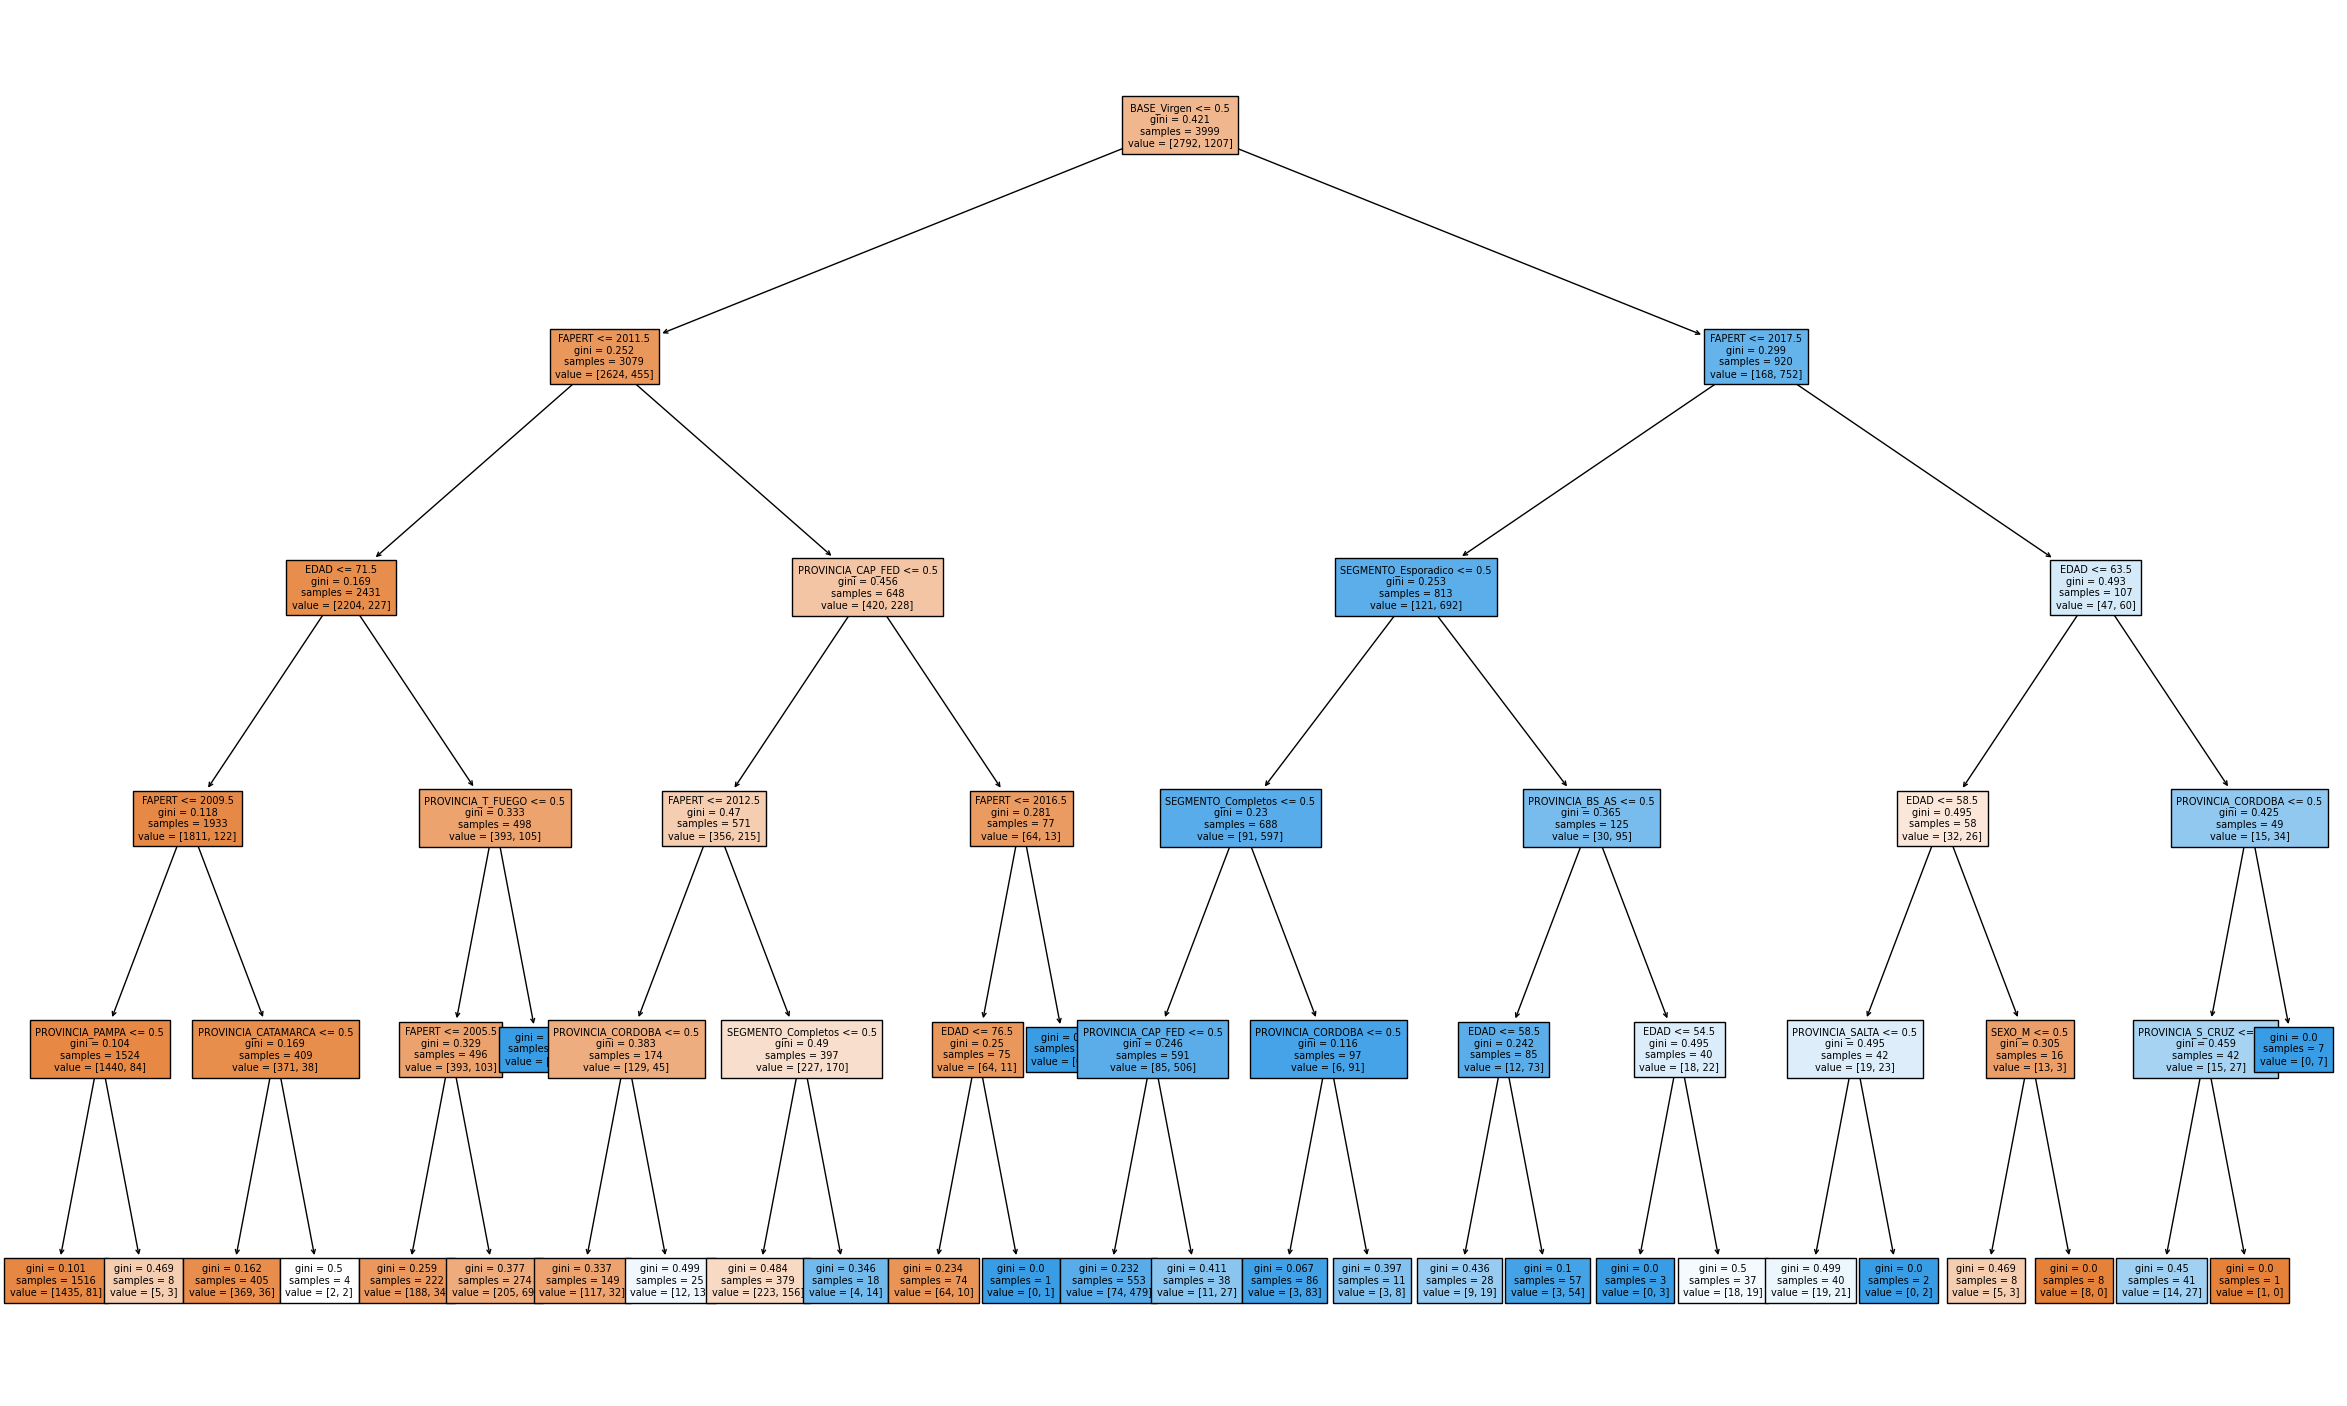

In [ ]:
#SEPARO LOS DATOS Train (80%) y Test (20%)
x_train, x_test, y_train, y_test = train_test_split(xt, yt, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state = 42)

# AJUSTE DE ESCALAS
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

#Entrenamiento del Modelo
classif = tree.fit(x_train,y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(30,18))
plot_tree(decision_tree=tree, feature_names=x_train.columns, filled=True, fontsize=7)

Gini (Índice de Gini):

El índice de Gini es una medida de impureza o desorden en un conjunto de datos.
Se utiliza para cuantificar cuán homogéneo o heterogéneo es un conjunto de datos en términos de sus clases o categorías.
El valor del índice de Gini varía entre 0 y 1, donde 0 representa la pureza máxima (todos los elementos pertenecen a la misma clase) y 1 representa la impureza máxima (los elementos se distribuyen uniformemente en todas las clases).
En el contexto de los árboles de decisión, se calcula el índice de Gini para cada posible división en un nodo y se utiliza para medir qué división resulta en una reducción más significativa de la impureza.
Samples (Muestras):

"Samples" se refiere al número total de ejemplos (instancias de datos) que se encuentran en un nodo específico del árbol de decisión.
Este valor representa la cantidad de datos que cumplen con los criterios definidos por el nodo actual.
Values (Valores):

"Values" se refiere a la distribución de clases en un nodo específico del árbol de decisión.
Proporciona información sobre cuántas muestras en el nodo pertenecen a cada clase o categoría.
Por ejemplo, si estás trabajando en un problema de clasificación binaria, los "values" mostrarían cuántas muestras pertenecen a la clase positiva y cuántas pertenecen a la clase negativa en ese nodo.

In [ ]:
#VARIABLES PARA RANDOMFOREST
x = xt.values
y = target

In [ ]:
# Validación cruzada estratificada con 5 divisiones . Esto es útil
#para evaluar el rendimiento #de un modelo de aprendizaje automático
#en múltiples subconjuntos de datos y ayudar a prevenir el sobreajuste.

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(x, y)
train, test = list(skf.split(x, y))[0]
x_train_n, y_train_n, x_test_n, y_test_n= x[train], y[train], x[test], y[test]

# AJUSTO EL MODELO
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)
model.fit(x_train_n, y_train_n)
prediccion = model.predict(x_test_n)

## Presicion - Accurancy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_n, prediccion)
print("Exactitud:", accuracy)

Exactitud: 0.839


## Matriz de confusión

Matriz de Confusión:
[[648  46]
 [115 191]]


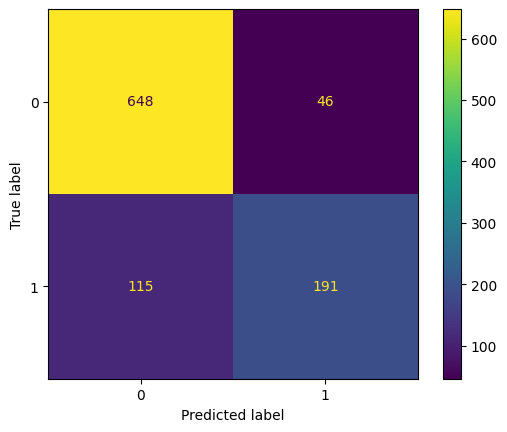

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_n, prediccion)
print("Matriz de Confusión:")
print(conf_matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
graf = ConfusionMatrixDisplay(confusion_matrix(y_test_n, prediccion))
graf.plot()

In [ ]:
#                           Predicción Positiva       Predicción Negativa
#Valor Real Positivo        TP (Verdadero Positivo)   FN (Falso Negativo)
#Valor Real Negativo        FP (Falso Positivo)       TN (Verdadero Negativo)
#Exactitud (Accuracy): Se calcula como (TP + TN) / (TP + TN + FP + FN) y representa la proporción de predicciones correctas en el conjunto de datos.
#(648 + 191) / (648 + 191 + 115 + 46) = 8,39

## F1 - Score

In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score: {f1_score(y_test_n, prediccion)}")

F1 Score: 0.7034990791896868


AUC for our classifier is: 0.870048595807199


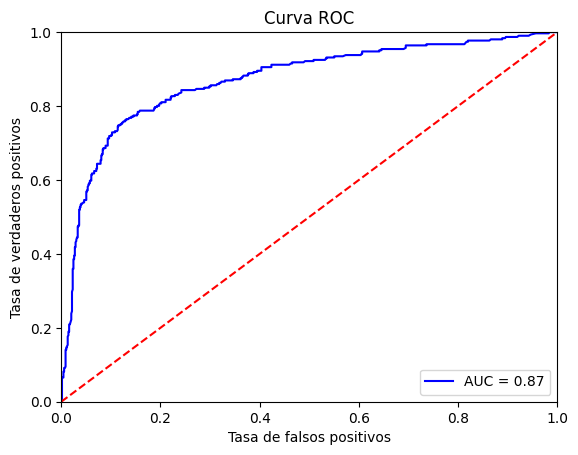

In [ ]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(x_test_n)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_n, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

Se realiza predicciones de probabilidad en el conjunto de prueba (x_test_n) utilizando model.predict_proba(x_test_n). Esto significa que no se devuelve solo las etiquetas de clase (como 0 o 1), sino las probabilidades asociadas con cada clase. Luego, el código extrae las probabilidades asociadas con la clase positiva (class_probabilities[:, 1]), que se utilizarán en la construcción de la Curva ROC.

Se calculan los puntos de la Curva ROC utilizando roc_curve(y_test_n, preds), donde y_test_n son las etiquetas reales del conjunto de prueba y preds son las probabilidades de clase positiva predichas por el modelo. Esto genera tres arrays: fpr (Tasa de falsos positivo), tpr (Tasa de verdaderos positivos) y threshold (umbral de clasificación).

Se calcula el Área bajo la Curva (AUC) utilizando auc(fpr, tpr). El AUC mide la capacidad del modelo para distinguir entre clases y cuantifica el rendimiento de clasificación del modelo. Cuanto mayor sea el AUC, mejor será el modelo en la clasificación.

Finalmente, el código crea un gráfico de la Curva ROC para visualizar el rendimiento del modelo. Los ejes X e Y representan la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR), respectivamente. La curva muestra cómo varía la capacidad del modelo para clasificar a medida que se cambia el umbral de clasificación. Idealmente, quieres que la curva ROC esté lo más cerca posible de la esquina superior izquierda, lo que indica una alta TPR y una baja FPR en varios umbrales de clasificación. La línea punteada roja representa el rendimiento de un clasificador aleatorio. Cuanto más alejada esté la curva ROC del clasificador aleatorio y cuanto mayor sea el AUC, mejor será el rendimiento del modelo.

El valor de AUC se imprime para proporcionar una medida cuantitativa del rendimiento del modelo en la clasificación binaria. Un valor de AUC cercano a 1 es deseable, indicando un buen rendimiento del modelo, mientras que un valor cercano a 0.5 sugiere un rendimiento similar al azar.

# **Probabilidad de venta**

In [ ]:
df_prueba = copy.deepcopy(valores_prueba)

df_prueba_s = df_prueba.values
nueva_prediccion = model.predict(df_prueba_s)
clase_probabilidad = model.predict_proba(df_prueba_s)

df_prueba["Probabilidad_Venta"] = clase_probabilidad[:, 1]

In [ ]:
#DATOS DE PRUEBA CON LA PROBABILIDAD DE VENTA
df_prueba["Probabilidad_Venta"]

INDEX
GAL_PRUEBAS_00291    0.777059
GAL_PRUEBAS_00724    0.205647
GAL_PRUEBAS_00746    0.164172
GAL_PRUEBAS_02740    0.660961
GAL_PRUEBAS_03552    0.136631
                       ...   
GAL_PRUEBAS_00193    0.138231
GAL_PRUEBAS_00194    0.133448
GAL_PRUEBAS_00195    0.143759
GAL_PRUEBAS_00196    0.183179
GAL_PRUEBAS_00197    0.204966
Name: Probabilidad_Venta, Length: 233, dtype: float64

In [ ]:
df_prueba.to_excel('df_prueba.xlsx')
from google.colab import files
files.download('df_prueba.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **RandomForest_1 Alternativa con la Base con ANT en lugar de FAPERT**

In [ ]:
# VARIABLES PARA CONSTRUIR UN ARBOL DE DESCICION
xt_1 = valores_1
yt_1 = datos_1['VENTA'] = datos_1['VENTA'].map({0: "NO", 1: "SI"})

[Text(0.5165094339622641, 0.9166666666666666, 'BASE_Stock <= 0.5\ngini = 0.421\nsamples = 3999\nvalue = [2792, 1207]'),
 Text(0.25943396226415094, 0.75, 'ANT <= 5.5\ngini = 0.299\nsamples = 920\nvalue = [168, 752]'),
 Text(0.14150943396226415, 0.5833333333333334, 'EDAD <= 63.5\ngini = 0.493\nsamples = 107\nvalue = [47, 60]'),
 Text(0.07547169811320754, 0.4166666666666667, 'EDAD <= 58.5\ngini = 0.495\nsamples = 58\nvalue = [32, 26]'),
 Text(0.03773584905660377, 0.25, 'SEGMENTO_Completos <= 0.5\ngini = 0.495\nsamples = 42\nvalue = [19, 23]'),
 Text(0.018867924528301886, 0.08333333333333333, 'gini = 0.499\nsamples = 40\nvalue = [19, 21]'),
 Text(0.05660377358490566, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.11320754716981132, 0.25, 'SEXO_F <= 0.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.09433962264150944, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.1320754716981132, 0.08333333333333333, 'gini = 0.469\nsamples = 8\n

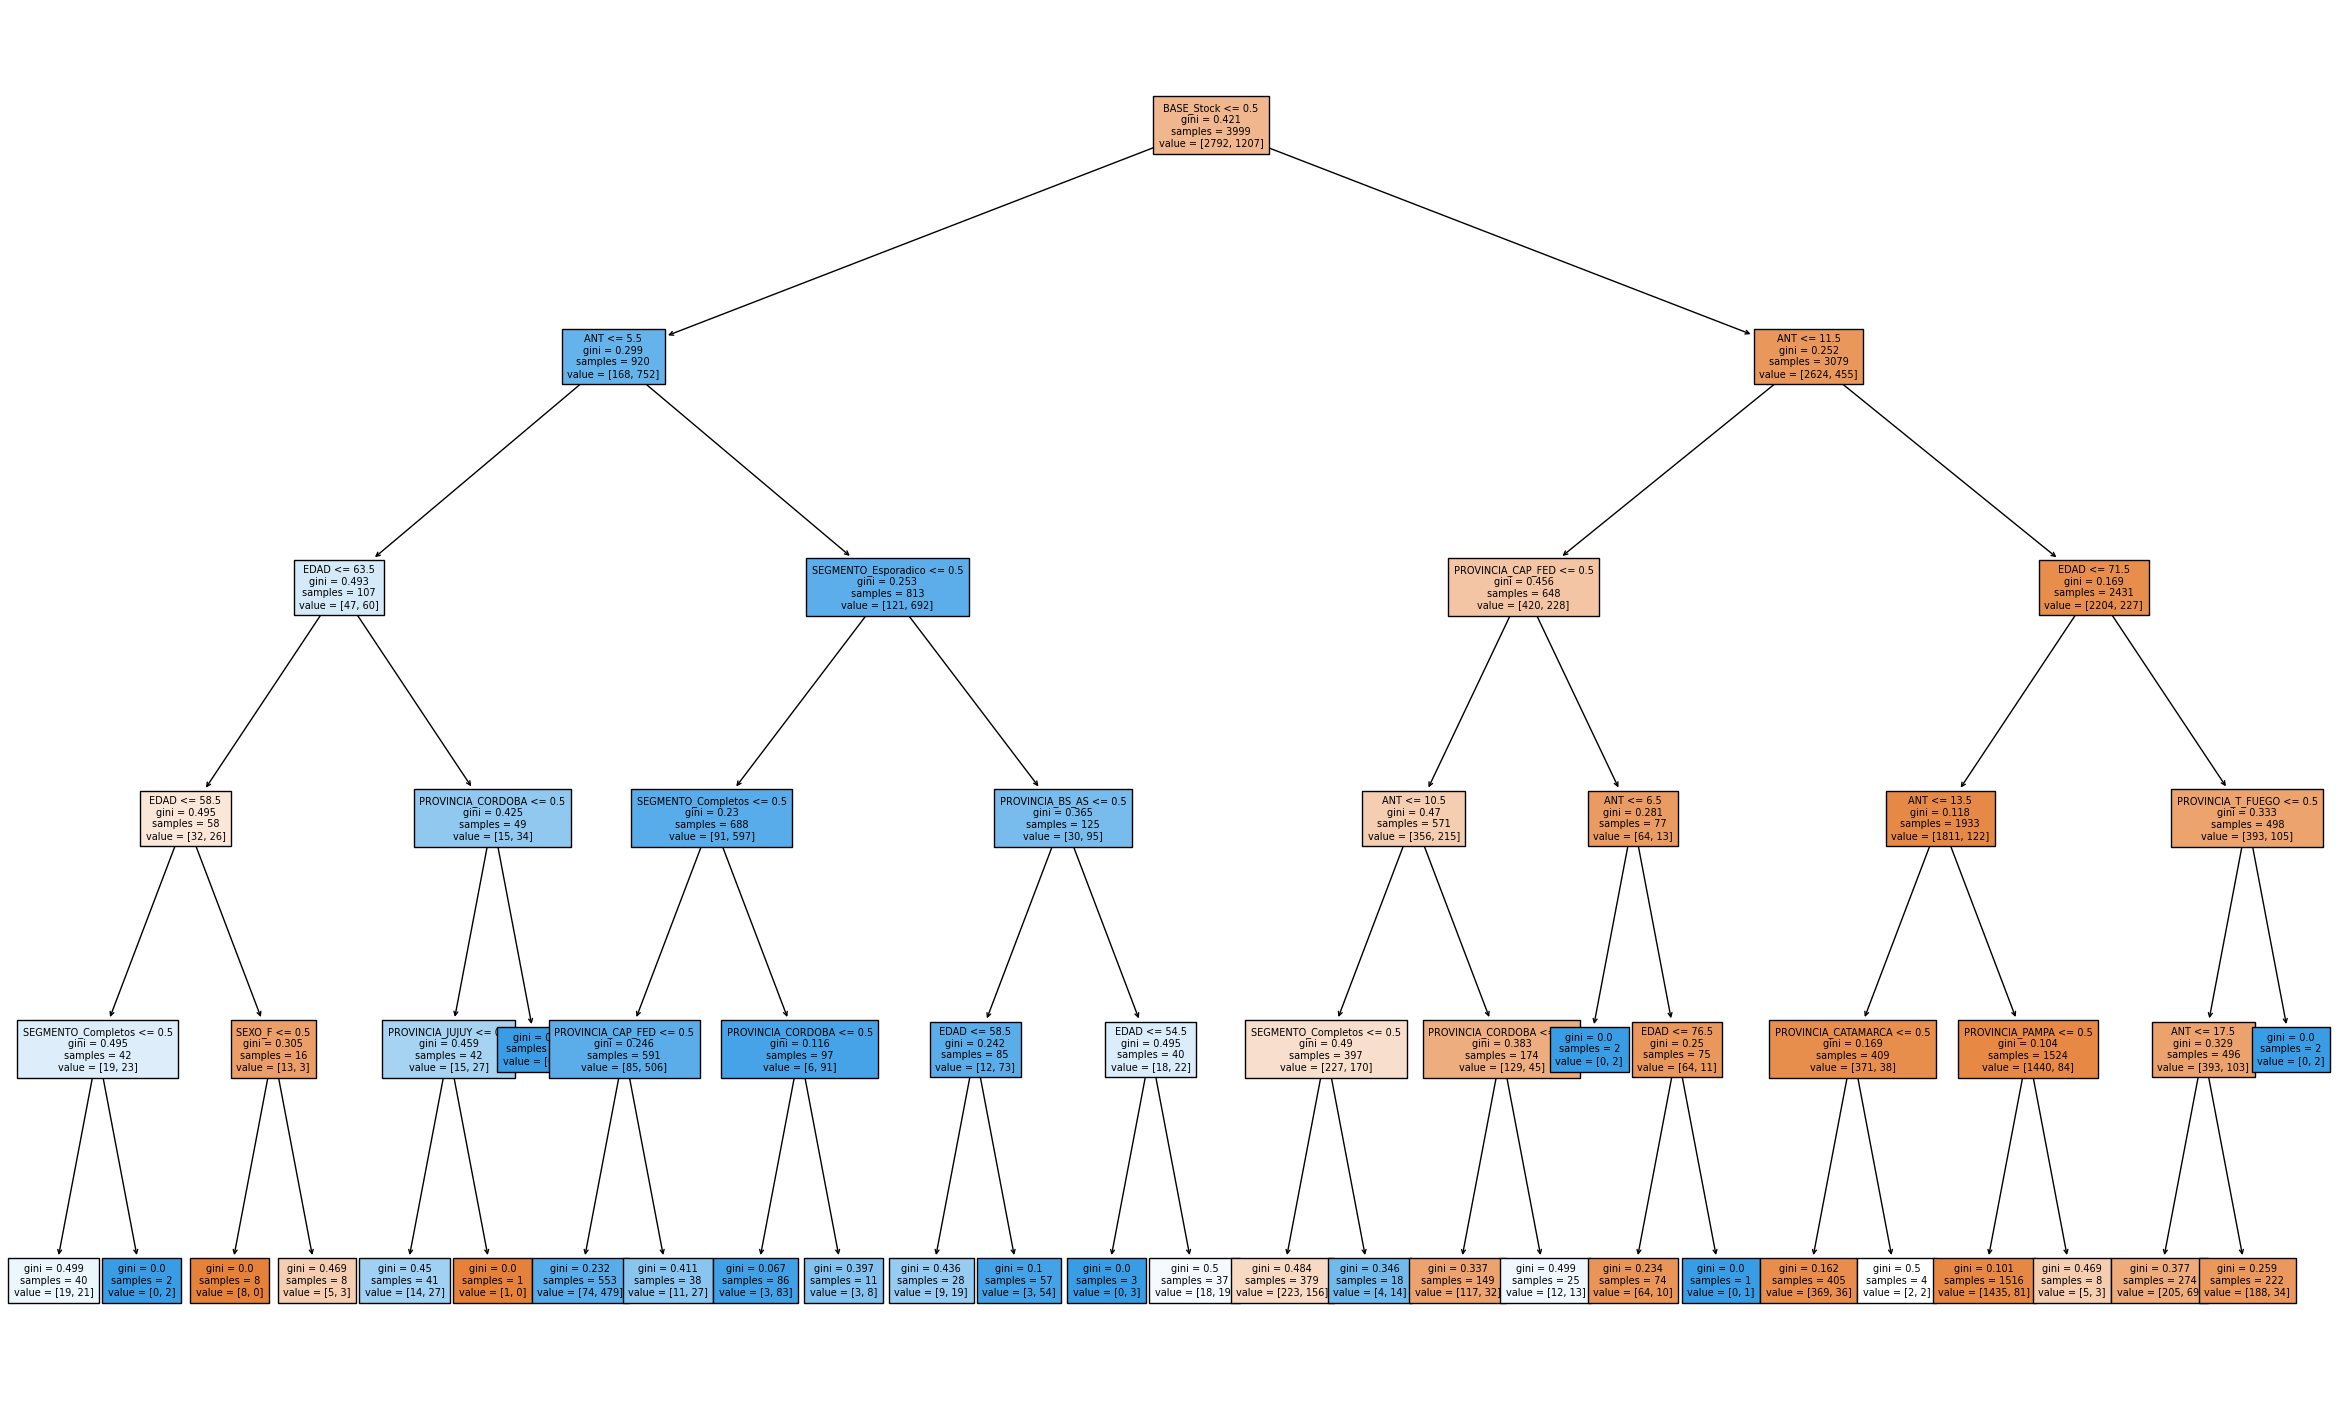

In [ ]:
#Separamos los datos entre Train (80%) y Test (20%)
x_train, x_test, y_train, y_test = train_test_split(xt_1, yt_1, train_size=0.80, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state = 42)

# Ajuste de escalas
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

#Entrenamiento del Modelo
classif = tree.fit(x_train,y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(30,18))
plot_tree(decision_tree=tree, feature_names=x_train.columns, filled=True, fontsize=7)

In [ ]:
#VARIABLES PARA RANDOMFOREST
x_1 = xt_1.values
y_1 = target_1

In [ ]:
# Validación cruzada estratificada con 5 divisiones . Esto es útil
#para evaluar el rendimiento #de un modelo de aprendizaje automático
#en múltiples subconjuntos de datos y ayudar a prevenir el sobreajuste.

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(x_1, y_1)
train, test = list(skf.split(x_1, y_1))[0]
x_train_n_1, y_train_n_1, x_test_n_1, y_test_n_1= x[train], y[train], x[test], y[test]

# AJUSTO EL MODELO
model_1 = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)
model_1.fit(x_train_n_1, y_train_n_1)
prediccion = model.predict(x_test_n_1)

## Precision

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_n_1, prediccion)
print("Exactitud:", accuracy)

Exactitud: 0.839


## Curva ROC

AUC for our classifier is: 0.870048595807199


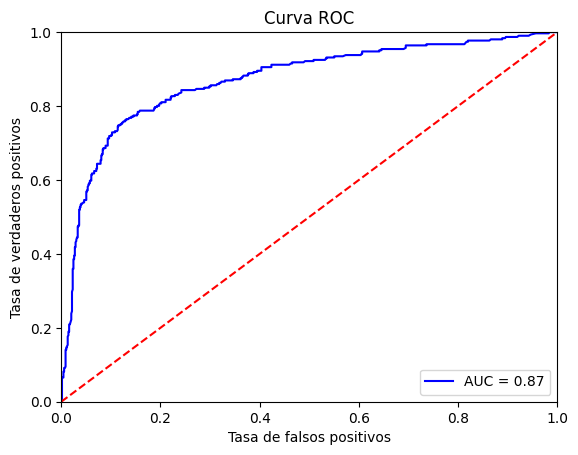

In [ ]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(x_test_n_1)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_n_1, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

# **Probabilidad de Venta_1**

In [ ]:
df_prueba_1 = copy.deepcopy(valores_prueba_1)

df_prueba_s = df_prueba_1.values
nueva_prediccion = model_1.predict(df_prueba_s)
clase_probabilidad_1 = model_1.predict_proba(df_prueba_s)

df_prueba_1["Probabilidad_Venta"] = clase_probabilidad_1[:, 1]

In [ ]:
df_prueba_1["Probabilidad_Venta"]

INDEX
GAL_PRUEBAS_00291    0.136781
GAL_PRUEBAS_00724    0.140019
GAL_PRUEBAS_00746    0.136383
GAL_PRUEBAS_02740    0.131322
GAL_PRUEBAS_03552    0.394780
                       ...   
GAL_PRUEBAS_00193    0.165132
GAL_PRUEBAS_00194    0.120535
GAL_PRUEBAS_00195    0.128399
GAL_PRUEBAS_00196    0.142061
GAL_PRUEBAS_00197    0.122441
Name: Probabilidad_Venta, Length: 233, dtype: float64

In [ ]:
#DESCARGA DE DATOS
df_prueba_1.to_excel('df_prueba_1.xlsx')
from google.colab import files
files.download('df_prueba_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>